In [65]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import math

In [78]:
## Since the number of likes, comment and location is object of analysis, we fill the NaN values
def adjustPostDf(df):
    df.location_id.fillna('', inplace=True)
    df.numbr_likes.fillna(0, inplace=True)
    df.number_comments.fillna(0, inplace=True)
    return df

## Since the number of likes and comment is object of analysis, we fill the NaN values
## Where not specified, business_account will be set at False and number posts at 0
def adjustProfDf(df):
    df.is_business_account.fillna(False, inplace=True)
    df.n_posts.fillna(0, inplace=True)
    return df


In [15]:
data_profiles = pd.read_csv('~/instagram_profiles.zip', delimiter='\t')

In [17]:
data_profiles = adjustProfDf(data_profiles)

In [18]:
## Computing profiles by number of posts in descending order
data_profiles = data_profiles.sort_values(by='n_posts', ascending=False)

In [19]:
## Profiles that post the most
data_profiles

,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
3990313,3661552,1.996648e+08,jasem33312,jasem33312,NaN,2.0,82049.0,183730.0,NaN,2019-06-30 19:14:19.780 -0400,False
2571453,3288809,8.563367e+09,koenigpic,Helperwait Studio,Веб сайты от идеи до запуска,4538.0,675.0,142428.0,vk.com/ru.helperwait,2019-05-07 00:14:06.799 -0400,True
4338921,3970193,1.273455e+09,rudyanto62,Rudyanto 王耀祝,NaN,164.0,1693.0,126340.0,NaN,2019-07-15 10:00:51.171 -0400,False
3942129,3621669,9.813508e+06,hometown_ni,AngelsCowboysLakers,All about live & let live. Peace & Harmony. La...,7488.0,1755.0,125220.0,NaN,2019-06-27 02:49:38.140 -0400,False
4219642,3851869,1.607309e+09,dwfitfiber_thailand,เห็นผลตั้งแต่เซ็ตแรกท้าลอง,✿รับตัวแทนรายได้ดีมาก\n🏧 KTB l SCB l KBANK | B...,7490.0,44951.0,117262.0,bit.ly/2GdIYJl,2019-07-13 02:10:07.317 -0400,True
...,...,...,...,...,...,...,...,...,...,...,...
2300812,3090965,3.864219e+09,daniel_ramos_126,Daniel “The Bull” Ramos,NaN,NaN,NaN,0.0,NaN,2019-04-10 06:12:41.305 -0400,False
2300811,3090964,5.007520e+09,khush_tkd,Khushal Jugurnath,NaN,NaN,NaN,0.0,NaN,2019-04-10 06:12:41.132 -0400,False
2300810,3090963,5.430227e+09,girlsjustwanttohavefun711,Vero_villabueno,NaN,NaN,NaN,0.0,NaN,2019-04-10 06:12:40.970 -0400,False
2300809,3090962,6.584424e+06,lost_within_the_universe,🌝 Mrs. Rodriguez 🌚,NaN,NaN,NaN,0.0,NaN,2019-04-10 06:12:40.792 -0400,False


In [82]:
most_liked_posts = []
least_commented_posts = []
most_commented_posts = []
pic_video = Counter()
location_counter = Counter()

#At every iteration:
# Fill NaN value for the set of fields we are interest in
# Compute the chunk most liked, most commented and least commented, we append the result to a list
# Count the photos only posts and the mixed type post
# Count the posts where the location was registered
for chunk in pd.read_csv('~/instagram_posts.zip', delimiter='\t', chunksize = 500000):
    chunk = adjustPostDf(chunk)
    most_liked_posts.append(chunk.sort_values(by='numbr_likes', ascending = False).head(10))
    least_commented_posts.append(chunk.sort_values(by = 'number_comments', ascending = True).head(10))
    most_commented_posts.append(chunk.sort_values(by = 'number_comments', ascending = False).head(10))
    pic_video[1] += len(chunk.loc[chunk['post_type']==1])
    pic_video[3] += len(chunk.loc[chunk['post_type']==3])
    location_yes = len(chunk.loc[chunk['location_id'] != ''])
    location_counter['Y'] += location_yes
    location_counter['N'] += (len(chunk) - location_yes)
    
# We concate the results
most_liked_posts = pd.concat(most_liked_posts)
least_commented_posts = pd.concat(least_commented_posts)
most_commented_posts = pd.concat(most_commented_posts)

In [94]:
# Compute the most liked posts over the final set
most_liked_posts = most_liked_posts.sort_values(by='numbr_likes', ascending=False)
most_liked_posts

,sid,sid_profile,post_id,profile_id,location_id,cts,post_type,description,numbr_likes,number_comments
19624085,4768909,531404,Bt3yaXmAM0d,4.906778e+07,,2019-02-14 18:07:43.000,1,"You make me very happy. Happy Valentine’s Day,...",8822952.0,165886.0
19623988,4768904,531404,BuwffB7g8cK,4.906778e+07,,2019-03-08 18:39:02.000,1,I am so in awe of @colesprouse and @haleyluhoo...,5447066.0,25303.0
19624082,4768906,531404,Buc1gyZAaMQ,4.906778e+07,,2019-03-01 03:26:42.000,1,"Thinking of you, Luke. And praying for your sa...",5116398.0,40608.0
19623986,4768902,531404,BvcukE8AMuG,4.906778e+07,,2019-03-25 22:57:23.000,1,Hire us to perform at your sweet sixteen X,4271466.0,30770.0
39701024,25302472,470575,BqSLFVBFLfq,4.275539e+08,321418175024105.0,2018-11-17 14:57:59.000,1,NaN,4264745.0,18691.0
...,...,...,...,...,...,...,...,...,...,...
22266891,6572219,1250188,BvnMviwFRlC,3.587997e+06,214895019.0,2019-03-30 00:33:30.000,1,rolês improváveis: yoga com cabras #MinhaCalif...,39627.0,367.0
22429907,6735293,1207318,Bvg76TOhTyu,7.498841e+06,,2019-03-27 10:10:59.000,1,Thank you to my superstar team @bjpascual 📸 @r...,38953.0,97.0
22399538,6705111,1201765,BvBnwadAxGt,5.591062e+09,,2019-03-15 06:18:24.000,1,Rip fizzy you beautiful little soul x 🙏😞💫 x,38672.0,716.0
22041993,6347003,1139302,BtoUx5AgDkX,1.769455e+08,,2019-02-08 18:00:11.000,1,But how does it happen? Check out this stunnin...,37781.0,73.0


In [93]:
# Compute the most commented posts over the final set
most_commented_posts = most_commented_posts.sort_values(by='number_comments', ascending=False)
most_commented_posts

,sid,sid_profile,post_id,profile_id,location_id,cts,post_type,description,numbr_likes,number_comments
41873060,27503892,-1,Bx2sPAjHviO,1.635670e+09,244000222.0,2019-05-24 20:00:04.000,1,Anne Oğul 🧡,38871.0,488953.0
12164781,39701672,3940995,BuGjhWAhAW5,4.282994e+08,,2019-02-20 12:46:12.000,1,When you scared to jump . Thats is exactly whe...,81523.0,313997.0
33261751,9952351,3335216,BJ-rkpTgn1N,5.533645e+07,375314645.0,2016-09-05 17:32:27.000,1,💋💋💋❤️,54507.0,257488.0
11149127,22594279,3831202,BMtisIxjhtT,5.697152e+06,277222335949200.0,2016-11-12 14:21:55.000,1,Кавайная я! 💕🌟☺️,331703.0,214365.0
9383817,37533033,3637382,BzOOWj3DfZK,1.062916e+09,,2019-06-27 19:54:33.000,1,💬 H E D İ Y E M İ Z VAR .\n. KAZANAN kişiye >...,23515.0,189888.0
...,...,...,...,...,...,...,...,...,...,...
23648115,7954871,2302795,Bv45C9yHHxs,1.782301e+08,,2019-04-05 17:27:43.000,1,Have you finished yet? ... Binging part 2 😏,145199.0,2517.0
19069247,4184132,692635,Bvc2rnPlIYo,1.922540e+09,1073274452813521.0,2019-03-26 00:09:51.000,1,We are partnering up with @chicklet.hf and @ma...,2602.0,2098.0
19065147,4179862,693331,BVWXwj7BJeC,5.397124e+09,,2017-06-15 06:06:25.000,1,森羅万象ににて紅葉に芸術に春夏秋冬に歌の練習\n駆け引きに音楽に芸術に基本的素敵な晩餐です\...,18152.0,1940.0
19069248,4184134,692635,BvcCs7ZFxHf,1.922540e+09,212988663.0,2019-03-25 16:34:07.000,1,We are partnering up with @chicklet.hf and @ma...,8190.0,1813.0


In [92]:
# Compute the least liked posts over the final set
least_commented_posts = least_commented_posts.sort_values(by = 'number_comments', ascending = True)
least_commented_posts

,sid,sid_profile,post_id,profile_id,location_id,cts,post_type,description,numbr_likes,number_comments
0,28370919,3496776,BXdjjUlgcgq,2.237948e+09,1022366247837915.0,2017-08-06 20:06:57.000,2,Wreckloose! Deevalley bike park laps on the @i...,80.0,0.0
28246768,12721525,1562826,Bvio_PvFC93,9.818463e+08,,2019-03-28 02:04:06.000,1,bibi💫,8.0,0.0
28246769,12721540,1562826,Bu_k7oLlFjJ,9.818463e+08,,2019-03-14 11:15:15.000,1,EMMMMMM,11.0,0.0
28246770,12724989,1563363,Bu83azpHRKl,1.743359e+09,,2019-03-13 09:59:04.000,1,NaN,13.0,0.0
28749999,13322257,1668133,Bb3Z94ZDuYD,9.830111e+08,,2017-11-24 06:09:01.000,1,Haha stole the phone 😊😊,11.0,0.0
...,...,...,...,...,...,...,...,...,...,...
14687538,41907907,4313621,B0wcxUXBXTA,1.049341e+10,1386062.0,2019-08-04 23:23:41.000,1,Défilé sur le char pour les filles #feteafanfo...,10.0,0.0
14661711,41885020,4310276,BtaE54Yh0hV,1.012397e+10,330597027.0,2019-02-03 06:12:05.000,1,I think that this picture is beautiful in blac...,11.0,0.0
14661712,41885022,4310276,BtaESMwBBKb,1.012397e+10,330597027.0,2019-02-03 06:06:40.000,1,All that you see in that is dead will be live ...,13.0,0.0
14812261,42017371,4328793,Bw4WmXRBb-M,1.959402e+08,374193518.0,2019-04-30 14:58:07.000,1,Places I’d rather be @baigent1992 ☀️#Palma #Ma...,25.0,0.0


In [52]:
business_counter = Counter()

In [91]:
# Count business account and use that value to derive non-business ones

n_profiles = len(data_profiles)
business_counter['Y'] = len(data_profiles.loc[data_profiles['is_business_account']])
business_counter['N'] = n_profiles - business_counter['Y']

#Compute percentage

business_perc = business_counter['Y']*100/n_profiles
non_business_perc = business_counter['N']*100/n_profiles

print('Business accounts are {} of the total'.format(round(business_perc,4)))
print('Non-Business accounts are {} of the total'.format(round(non_business_perc,4)))

Business accounts are 18.9652 of the total
Non-Business accounts are 81.0348 of the total


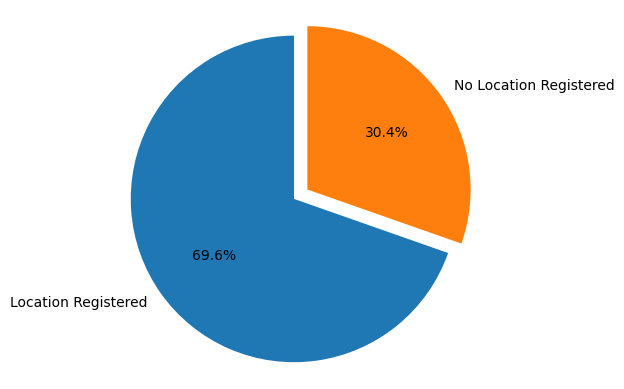

In [90]:
#Given location values computed earlier, we compute a pie chart
labels = 'Location Registered', 'No Location Registered'
tot = location_counter['Y'] + location_counter['N']
sizes = [round(location_counter['Y']*100/tot,4),round(location_counter['N']*100/tot,4)]
explode = (0.1, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal') 

plt.show()